In [1]:
#Importacion de librerias 

import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.formula.api as snf
import statsmodels.stats as ss

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11,9.4)

penguin_color = {
    'Adelie' : '#ff6602ff',
    'Gentoo' : '#0f7175ff',
    'Chinstrap' : '#c65dc9ff'
}

In [3]:
# Cargar los datos
# Datos crudos

pre_penguin_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')

pre_penguin_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [4]:
processed_penguins_df =(
    pre_penguin_df
    .dropna()
)

processed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [5]:
#Media o promedio pandas
processed_penguins_df.bill_depth_mm.mean()

17.164864864864867

In [6]:
#Media o promedio numpy
np.mean(processed_penguins_df.bill_depth_mm)

17.164864864864867

In [7]:
processed_penguins_df.mean()

C:\Users\MI PC\AppData\Local\Temp\ipykernel_3344\1618060137.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  processed_penguins_df.mean()


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

In [8]:
processed_penguins_df.median()

C:\Users\MI PC\AppData\Local\Temp\ipykernel_3344\3242987746.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  processed_penguins_df.median()


bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

In [9]:
processed_penguins_df.mode()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


In [10]:
processed_penguins_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


In [12]:
 # ------------------ medidas de dispersión -----------
#Maximo
processed_penguins_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

In [13]:
#Minimo
processed_penguins_df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

In [14]:
#Rango
processed_penguins_df.max(numeric_only=True) - processed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

In [18]:
#Desviación estándar
processed_penguins_df.std()

C:\Users\MI PC\AppData\Local\Temp\ipykernel_3344\85715720.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  processed_penguins_df.std()


bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [20]:
#Rango intercuartilico 
processed_penguins_df.quantile(0.75)

bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [21]:
processed_penguins_df.quantile(0.25)


bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
year                 2007.0
Name: 0.25, dtype: float64

In [22]:
processed_penguins_df.quantile(0.75) - processed_penguins_df.quantile(0.25)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [27]:
(
    processed_penguins_df
    .quantile(q=[0.75,0.50,0.25])
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr = lambda df: df[0.75] - df[0.25]
    )
)

,variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0
4,year,2009.0,2008.0,2007.0,2.0


TypeError: Could not convert AdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieAdelieGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooGentooChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrapChinstrap to numeric

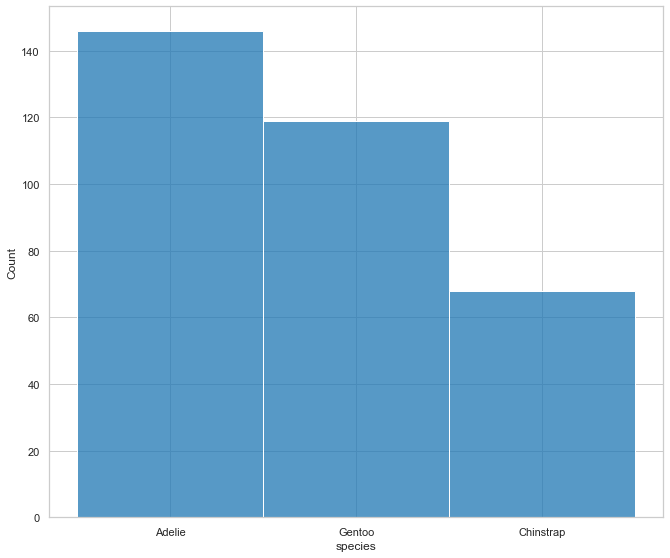

In [35]:
# Graficando 

sns.histplot(
    data = processed_penguins_df,
    x = 'flipper_length_mm',
    bins=20
)

plt.axvline(
    x= processed_penguins_df.flipper_length_mm.mean(),
    color = 'red',
    linestyle='dashed',
    linewidth = 2
)

plt.axvline(
    x= processed_penguins_df.flipper_length_mm.median(),
    color = 'green',
    linestyle='dashed',
    linewidth = 2
)

plt.axvline(
    x= processed_penguins_df.flipper_length_mm.quantile(),
    color = 'blue',
    linestyle='dashed',
    linewidth = 2
)